<center><h3 style="font-size: 24px;">Doctor Performance Analysis</h3></center>


###  Important Libraries :

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image

In [2]:
image_url = "https://digitalhealth.folio3.com/blog/wp-content/uploads/2020/06/What-is-the-Role-of-Data-Analytics-in-Healthcare.jpg"
Image(url=image_url)

### Loading datasets 1 :

In [3]:
df = pd.read_excel('Desktop/Clinic session Usage.xlsx')

df.head()

,Period date,Surgeon code,Session type,Time period,Number of booked sessions,Booked time - breaks,Number of used sessions,Total time used,Total time allocated for breaks,Session time used
0,2024-01-06,ANGB,Booked,1,1,300,0,0,0,0
1,2024-01-06,BAAO,Booked,2,2,570,1,63,0,0
2,2024-01-06,BARA,Booked,2,1,270,0,0,0,0
3,2024-01-06,BRYS,Booked,1,1,270,1,129,0,0
4,2024-01-06,BRYS,Booked,2,1,270,1,20,0,0


In [4]:
df.shape

(41, 10)

In [5]:
# Checking if any missing values for datasets 1 :
print(df.isnull().sum())

Period date                        0
Surgeon code                       0
Session type                       0
Time period                        0
Number of booked sessions          0
Booked time - breaks               0
Number of used sessions            0
Total time used                    0
Total time allocated for breaks    0
Session time used                  0
dtype: int64


### Statistics :

In [6]:
print("\nSummary Statistics for Data 1:")
print(df.describe())


Summary Statistics for Data 1:
               Period date  Time period  Number of booked sessions  \
count                   41    41.000000                  41.000000   
mean   2024-01-06 00:00:00     1.609756                   1.975610   
min    2024-01-06 00:00:00     1.000000                   1.000000   
25%    2024-01-06 00:00:00     1.000000                   1.000000   
50%    2024-01-06 00:00:00     2.000000                   1.000000   
75%    2024-01-06 00:00:00     2.000000                   2.000000   
max    2024-01-06 00:00:00     5.000000                  11.000000   
std                    NaN     0.770651                   1.968347   

       Booked time - breaks  Number of used sessions  Total time used  \
count             41.000000                41.000000        41.000000   
mean             565.975610                 1.121951       110.682927   
min               60.000000                 0.000000         0.000000   
25%              270.000000                 0

In [7]:
# Print the columns of the DataFrame
print(df.columns)

Index(['Period date', 'Surgeon code', 'Session type', 'Time period',
       'Number of booked sessions', 'Booked time - breaks',
       'Number of used sessions', 'Total time used',
       'Total time allocated for breaks', 'Session time used'],
      dtype='object')


### Exploratory data analysis :

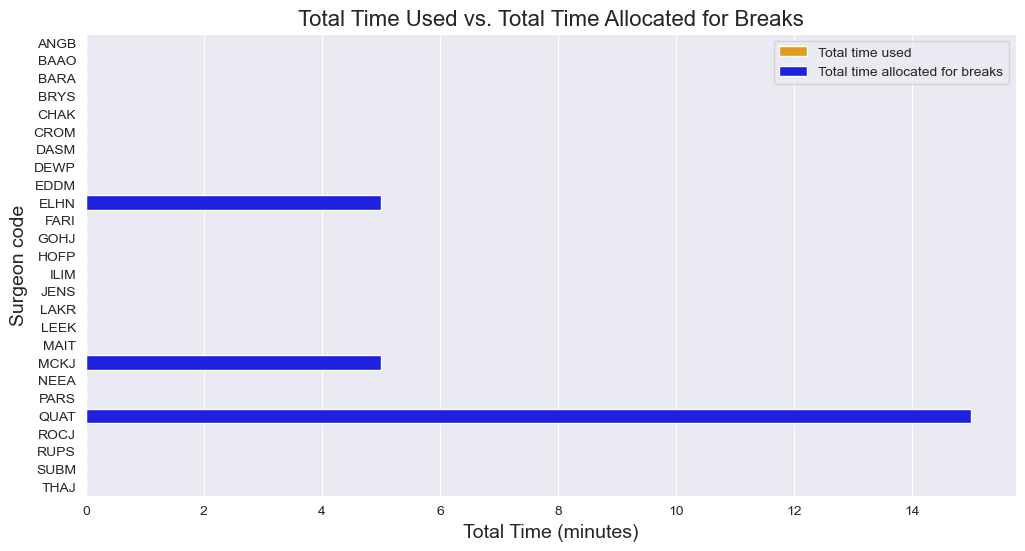

In [8]:
sns.set_style("darkgrid")

# Convert minutes to hours and minutes for easier understanding
def convert_to_hours_minutes(minutes):
    hours = minutes // 60
    minutes %= 60
    return f"{int(hours)}:{int(minutes):02d}"

df['Total time used (hours)'] = df['Session time used'].apply(convert_to_hours_minutes)
df['Total time allocated for breaks (hours)'] = df['Total time allocated for breaks'].apply(convert_to_hours_minutes)

# Plot
plt.figure(figsize=(12, 6))

# Plot Total time used
sns.barplot(x='Session time used', y='Surgeon code', data=df, color='orange', label='Total time used')

# Plot Total time allocated for breaks
sns.barplot(x='Total time allocated for breaks', y='Surgeon code', data=df, color='blue', label='Total time allocated for breaks')

plt.xlabel('Total Time (minutes)', fontsize=14)
plt.ylabel('Surgeon code', fontsize=14)
plt.title('Total Time Used vs. Total Time Allocated for Breaks', fontsize=16)
plt.legend()
plt.show()

- The plot compares the total time used and the total time allocated for breaks among different surgeons. It visualizes how efficiently surgeons utilize their allocated time and whether they adhere to break schedules. Surgeons with longer total time used may either be more productive or spend excessive time on tasks, warranting further investigation into their practices and performance.

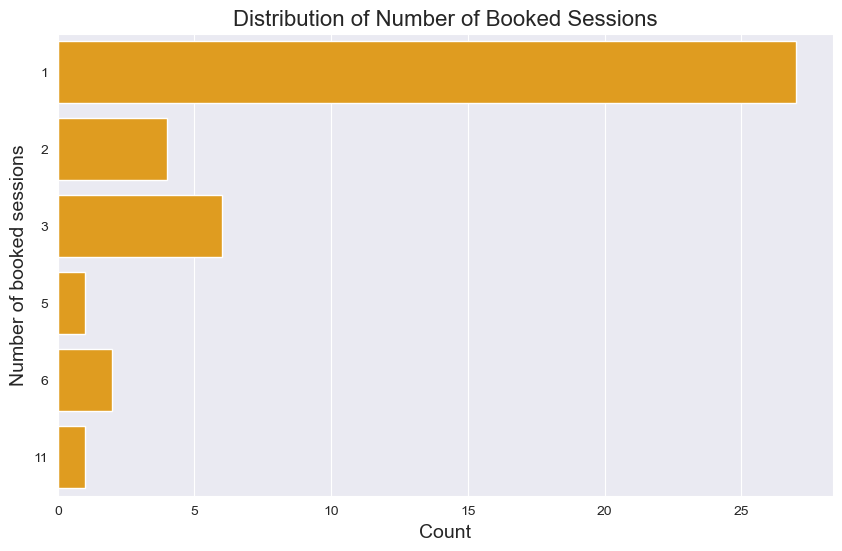

In [9]:
# Plot Number of Booked Sessions
plt.figure(figsize=(10, 6))
sns.countplot(y='Number of booked sessions', data=df, color='orange')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Number of booked sessions', fontsize=14)
plt.title('Distribution of Number of Booked Sessions', fontsize=16)
plt.show()

- The plot displays the distribution of the number of booked sessions for surgeons. It helps visualize the frequency of different session booking counts, offering insights into the scheduling patterns and workload distribution among surgeons. Surgeons with higher booking counts may either handle more cases or have busier schedules, suggesting varying workloads across the surgical team.

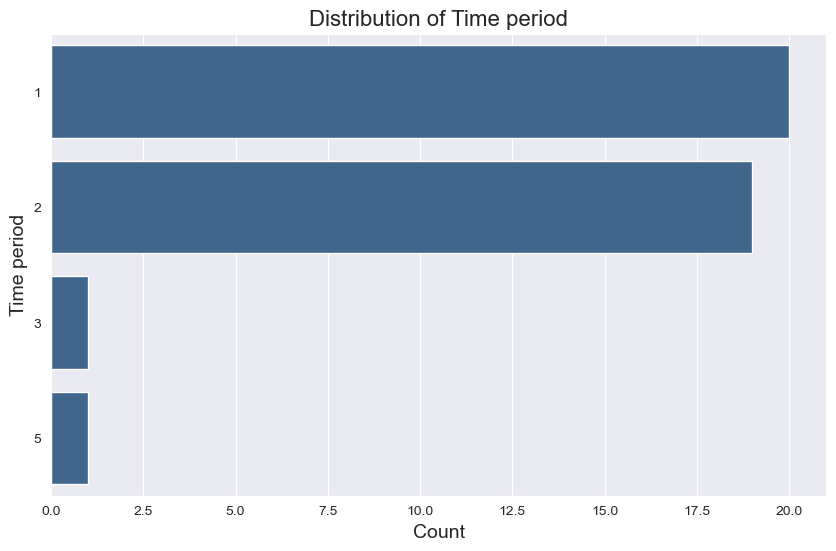

In [10]:
custom_color = (0.2, 0.4, 0.6)
# Plot Time period
plt.figure(figsize=(10, 6))
sns.countplot(y='Time period', data=df, color=custom_color)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Time period', fontsize=14)
plt.title('Distribution of Time period', fontsize=16)
plt.show()

- The plot illustrates the distribution of different time periods for sessions booked by surgeons. It provides insights into the frequency of sessions scheduled during various time periods, allowing for an understanding of the distribution of surgical activities throughout the day. This information can be valuable for optimizing scheduling processes and allocating resources efficiently based on the demand during different time periods.

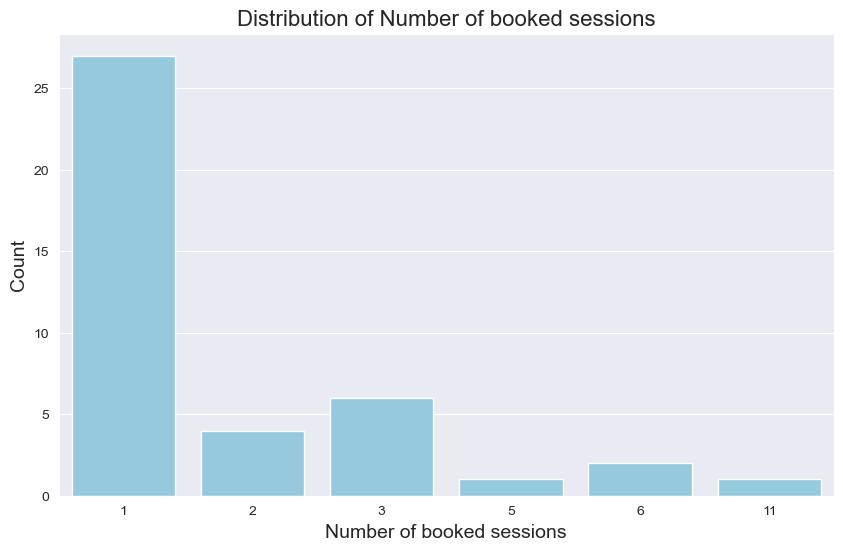

In [11]:
# Plot Number of booked sessions
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of booked sessions', data=df, color='skyblue')
plt.xlabel('Number of booked sessions', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Number of booked sessions', fontsize=16)
plt.show()

- This plot visualizes the distribution of the number of booked sessions. It provides insights into how many sessions were scheduled, allowing for an understanding of the frequency of sessions booked by surgeons. Such information can be crucial for managing resources effectively, identifying patterns in scheduling behavior, and optimizing the allocation of time slots for sessions.

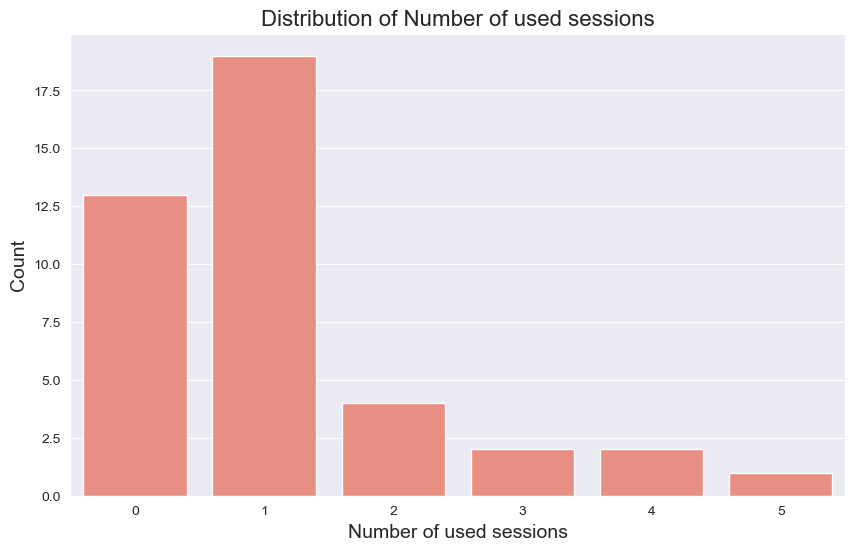

In [12]:
# Plot Number of used sessions
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of used sessions', data=df, color='salmon')
plt.xlabel('Number of used sessions', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Number of used sessions', fontsize=16)
plt.show()

- This plot illustrates the distribution of the number of used sessions. It offers insights into the utilization of scheduled sessions by surgeons, revealing patterns in session attendance or usage. Understanding the distribution of used sessions is essential for assessing the effectiveness of scheduling, identifying underutilized or overbooked slots, and optimizing resource allocation to enhance operational efficiency.

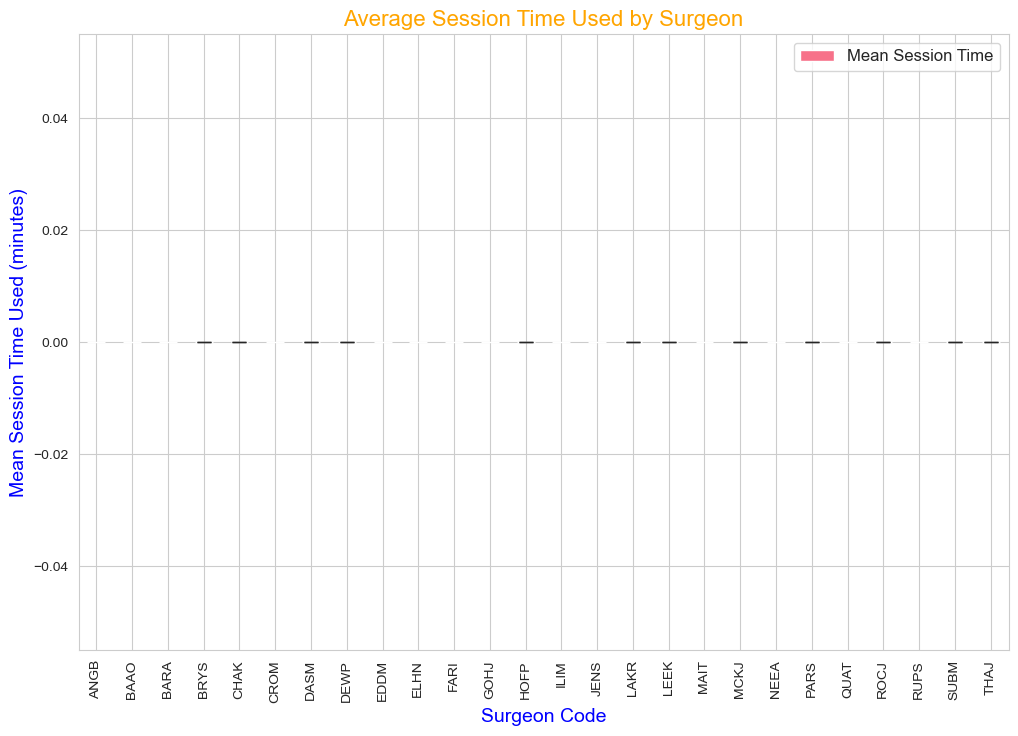

In [13]:
sns.set_style("whitegrid")

# Calculate mean and standard deviation of session time used for each surgeon
mean_session_time = df.groupby('Surgeon code')['Session time used'].mean()
std_session_time = df.groupby('Surgeon code')['Session time used'].std()

# Define a color palette for each surgeon
palette = sns.color_palette("husl", len(mean_session_time))

# Plot Surgeon code vs. Mean Session time used
plt.figure(figsize=(12, 8))
mean_session_time.plot(kind='bar', yerr=std_session_time, capsize=5, color=palette)

# Add labels and title with a colorful font
plt.xlabel('Surgeon Code', fontsize=14, color='blue')
plt.ylabel('Mean Session Time Used (minutes)', fontsize=14, color='blue')
plt.title('Average Session Time Used by Surgeon', fontsize=16, color='orange')

# Add legend with colorful text
plt.legend(['Mean Session Time'], loc='upper right', fontsize=12)

# Show plot
plt.show()

- The bar plot shows the average session time used by each surgeon. Each colored bar represents a different surgeon, and the height of the bar indicates the average time they spend in each session. The error bars on top of each bar show the variability or spread in session times. This helps us understand how consistent each surgeon is in their session durations, with shorter bars suggesting more consistent session times. Overall, it provides a clear comparison of session duration among surgeons, which can inform decisions about resource allocation and scheduling.

### Loading datasets 2 : 

In [14]:
df2 = pd.read_excel('Desktop/Clinic session cancellation.xlsx')
df2.head()

,Period date,Surgeon code,Session type,Time period,Type of code,Code (Cancell./Delay/Overtime),Number of times code used,Total time canc/delayed/overtime
0,2024-01-06,ELHN,Booked,1,Cancellation,SC,1,265
1,2024-01-06,KHIP,Booked,2,Cancellation,SC,1,265
2,2024-01-06,QUAT,Booked,1,Cancellation,SC,1,265
3,2024-01-06,WESG,Booked,1,Cancellation,SC,1,265
4,2024-01-06,JENS,Booked,5,Cancellation,SC,1,210


In [15]:
df2.shape

(24, 8)

In [16]:
# Checking if any missing values for datasets 2 :
print(df2.isnull().sum())

Period date                         0
Surgeon code                        0
Session type                        0
Time period                         0
Type of code                        0
Code (Cancell./Delay/Overtime)      0
Number of times code used           0
Total time canc/delayed/overtime    0
dtype: int64


### Merge the datasets based on the date column :

In [17]:
merged_data = pd.merge(df, df2, on="Period date")
merged_data.head(5)

,Period date,Surgeon code_x,Session type_x,Time period_x,Number of booked sessions,Booked time - breaks,Number of used sessions,Total time used,Total time allocated for breaks,Session time used,Total time used (hours),Total time allocated for breaks (hours),Surgeon code_y,Session type_y,Time period_y,Type of code,Code (Cancell./Delay/Overtime),Number of times code used,Total time canc/delayed/overtime
0,2024-01-06,ANGB,Booked,1,1,300,0,0,0,0,0:00,0:00,ELHN,Booked,1,Cancellation,SC,1,265
1,2024-01-06,ANGB,Booked,1,1,300,0,0,0,0,0:00,0:00,KHIP,Booked,2,Cancellation,SC,1,265
2,2024-01-06,ANGB,Booked,1,1,300,0,0,0,0,0:00,0:00,QUAT,Booked,1,Cancellation,SC,1,265
3,2024-01-06,ANGB,Booked,1,1,300,0,0,0,0,0:00,0:00,WESG,Booked,1,Cancellation,SC,1,265
4,2024-01-06,ANGB,Booked,1,1,300,0,0,0,0,0:00,0:00,JENS,Booked,5,Cancellation,SC,1,210


- Following the dataset merge, it's evident that surgeon appointments were affected by cancellations, varying in frequency and duration across different session types. Surgeon "ANGB" experienced cancellations attributed to different reasons, each with corresponding frequencies and durations. These insights underscore the importance of managing cancellations efficiently to minimize disruptions and enhance scheduling effectiveness for surgeons.

In [18]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Period date                              984 non-null    datetime64[ns]
 1   Surgeon code_x                           984 non-null    object        
 2   Session type_x                           984 non-null    object        
 3   Time period_x                            984 non-null    int64         
 4   Number of booked sessions                984 non-null    int64         
 5   Booked time - breaks                     984 non-null    int64         
 6   Number of used sessions                  984 non-null    int64         
 7   Total time used                          984 non-null    int64         
 8   Total time allocated for breaks          984 non-null    int64         
 9   Session time used                        98

In [19]:
print(merged_data.isnull().sum())

Period date                                0
Surgeon code_x                             0
Session type_x                             0
Time period_x                              0
Number of booked sessions                  0
Booked time - breaks                       0
Number of used sessions                    0
Total time used                            0
Total time allocated for breaks            0
Session time used                          0
Total time used (hours)                    0
Total time allocated for breaks (hours)    0
Surgeon code_y                             0
Session type_y                             0
Time period_y                              0
Type of code                               0
Code (Cancell./Delay/Overtime)             0
Number of times code used                  0
Total time canc/delayed/overtime           0
dtype: int64


In [20]:
# Convert infinity values to NaN
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
merged_data.shape

(984, 19)

### Merge Data Statistics :

In [22]:
print("\nSummary Statistics for clean dataset:")
print(merged_data.describe())


Summary Statistics for clean dataset:
               Period date  Time period_x  Number of booked sessions  \
count                  984     984.000000                 984.000000   
mean   2024-01-06 00:00:00       1.609756                   1.975610   
min    2024-01-06 00:00:00       1.000000                   1.000000   
25%    2024-01-06 00:00:00       1.000000                   1.000000   
50%    2024-01-06 00:00:00       2.000000                   1.000000   
75%    2024-01-06 00:00:00       2.000000                   2.000000   
max    2024-01-06 00:00:00       5.000000                  11.000000   
std                    NaN       0.761582                   1.945183   

       Booked time - breaks  Number of used sessions  Total time used  \
count            984.000000               984.000000       984.000000   
mean             565.975610                 1.121951       110.682927   
min               60.000000                 0.000000         0.000000   
25%              270

- The dataset represents sessions held on January 6, 2024. Most sessions occur during time periods numbered 1 to 5, with an average session period of about 1.6. Each session usually involves around 2 booked appointments, lasting approximately 9.4 hours on average including breaks. However, the actual time spent in sessions is much lower, averaging around 1 hour and 50 minutes. Delays or cancellations happen around 1.5 times per session day, with an average delay or cancellation lasting about 6 hours and 42 minutes.

### Check for missing values in the selected features :

In [23]:
selected_features = ['Number of booked sessions', 'Booked time - breaks', 'Total time used', 
                     'Total time allocated for breaks', 'Number of used sessions', 
                     'Number of times code used', 'Total time canc/delayed/overtime']

missing_values = merged_data[selected_features].isnull().sum()
print(missing_values)

Number of booked sessions           0
Booked time - breaks                0
Total time used                     0
Total time allocated for breaks     0
Number of used sessions             0
Number of times code used           0
Total time canc/delayed/overtime    0
dtype: int64


- If there are missing values, we may need to handle them appropriately before proceeding with visualization. Once confirmed, we can move on to plotting the selected features. 
Since there are no missing values in the selected features, we can proceed with plotting th for better understanding of the featurese:

### Feature selection/Engineering :

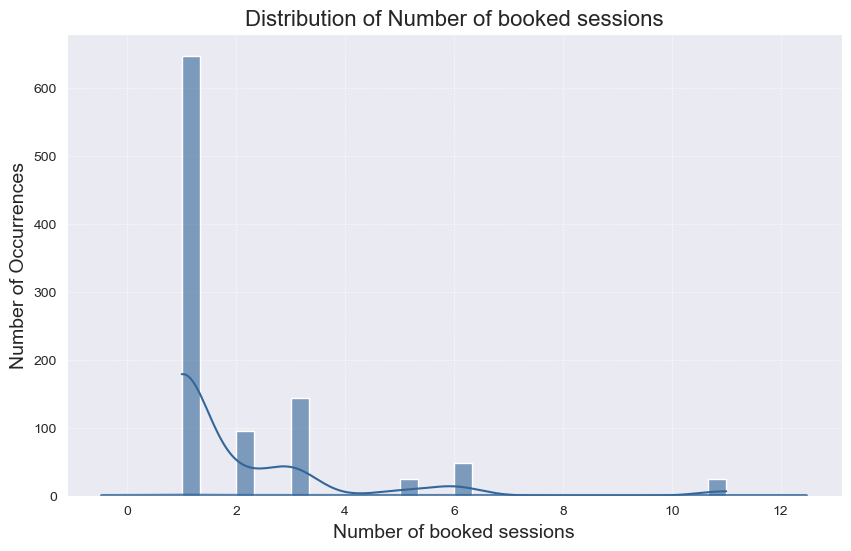

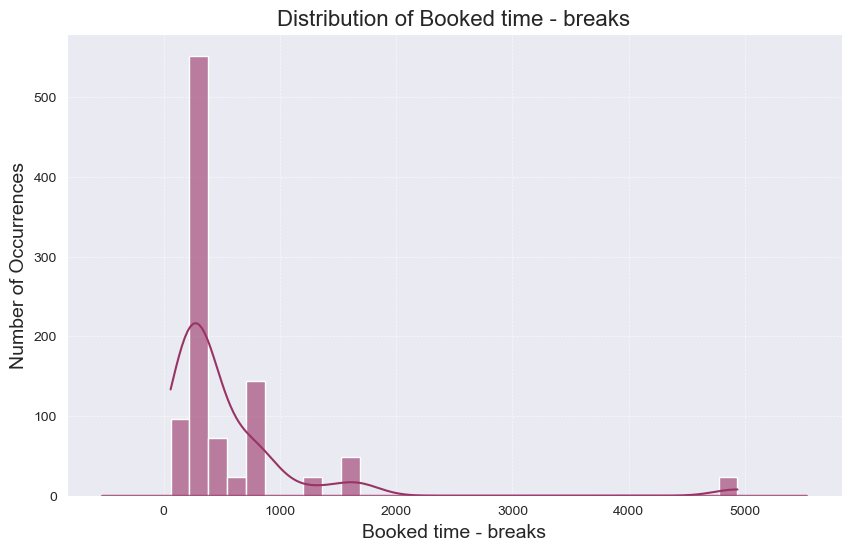

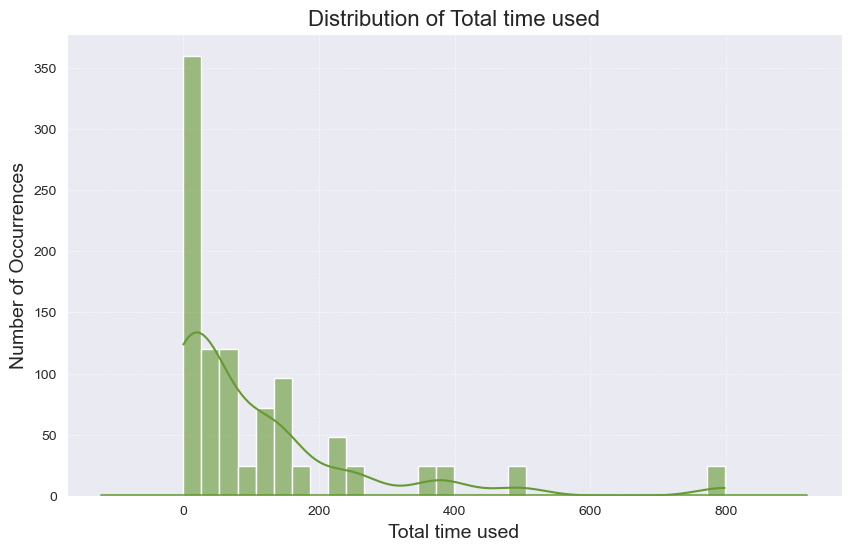

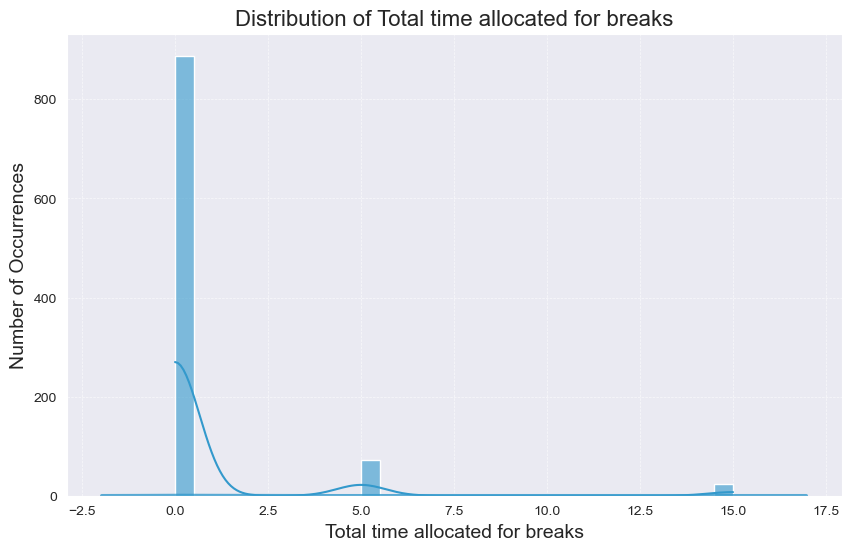

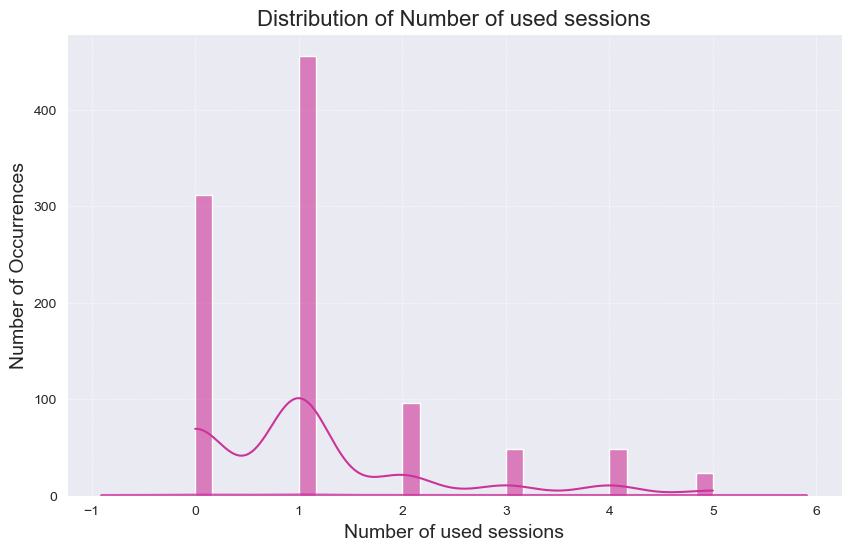

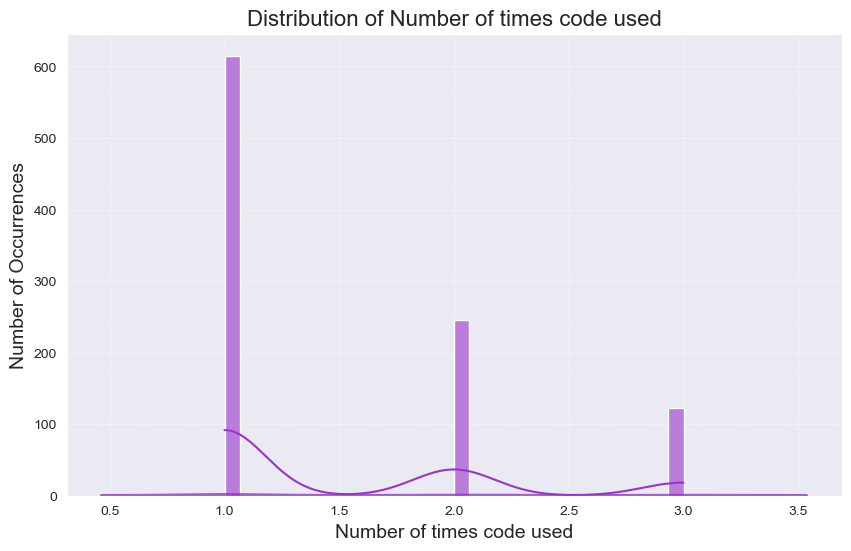

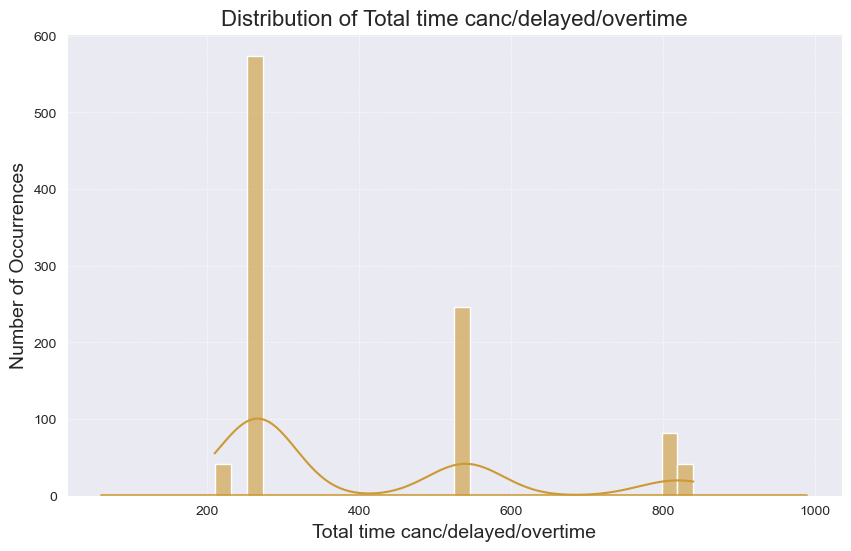

In [24]:
sns.set_style("darkgrid")

# Features selection 
features = ['Number of booked sessions', 'Booked time - breaks', 'Total time used', 
            'Total time allocated for breaks', 'Number of used sessions', 
            'Number of times code used', 'Total time canc/delayed/overtime']

# Custom color palette (RGB)
custom_palette = [(0.2, 0.4, 0.6), (0.6, 0.2, 0.4), (0.4, 0.6, 0.2),
                  (0.2, 0.6, 0.8), (0.8, 0.2, 0.6), (0.6, 0.2, 0.8), (0.8, 0.6, 0.2)]

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(merged_data[feature].dropna(), bins=30, kde=True, color=custom_palette[i], alpha=0.6)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Number of Occurrences', fontsize=14)
    ax.set_title(f'Distribution of {feature}', fontsize=16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Add vertical grid lines
    
    # Add a ribbon to the histogram
    sns.kdeplot(merged_data[feature].dropna(), color=custom_palette[i], linewidth=2.5, alpha=0.8)
    
    plt.show()

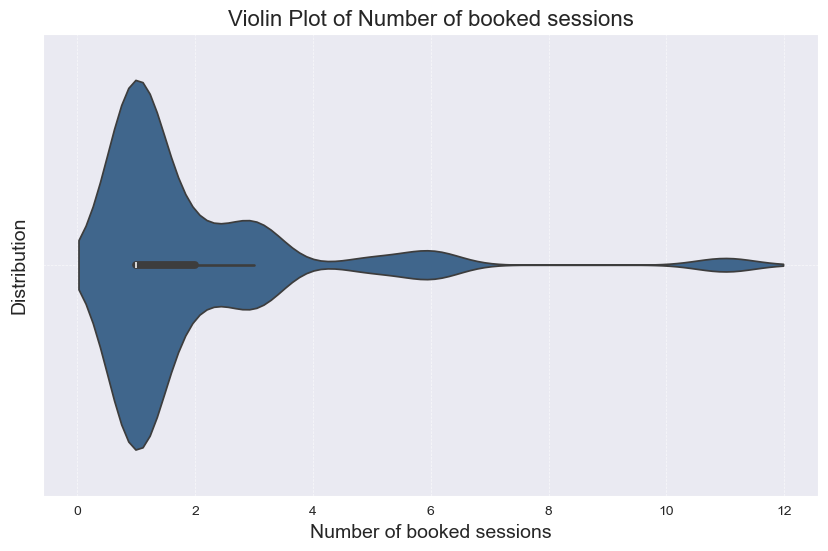

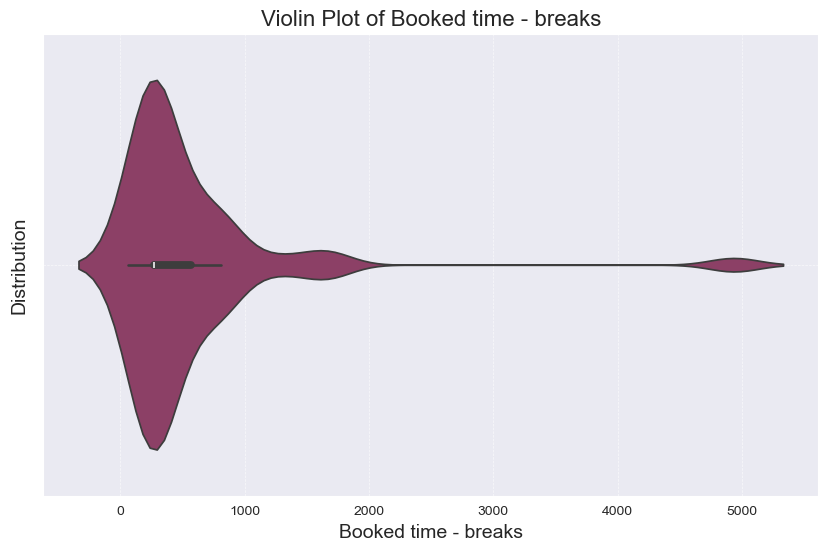

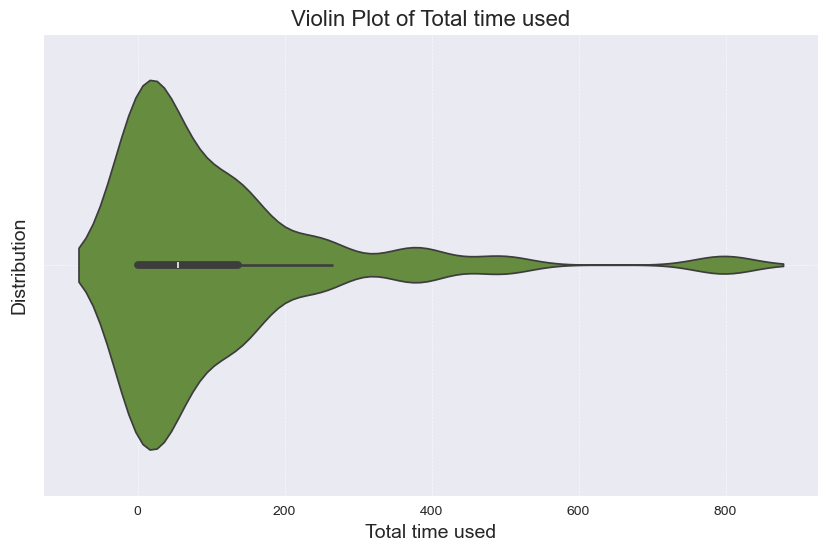

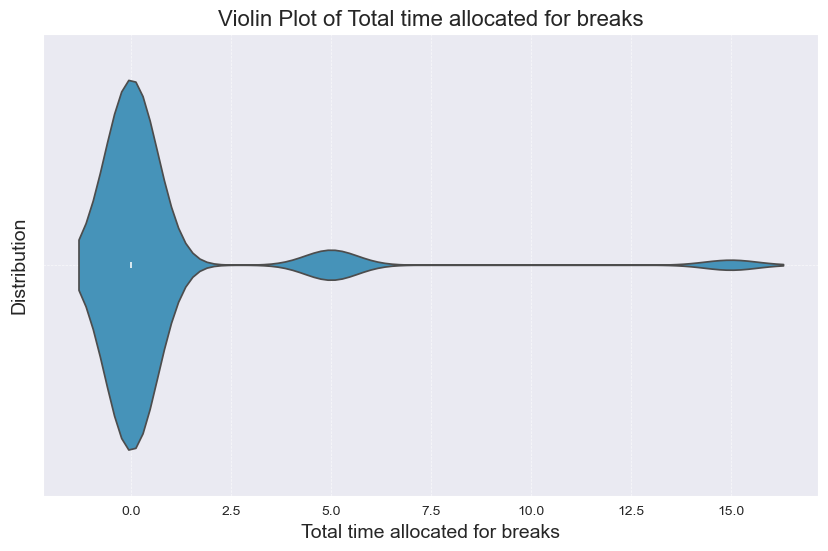

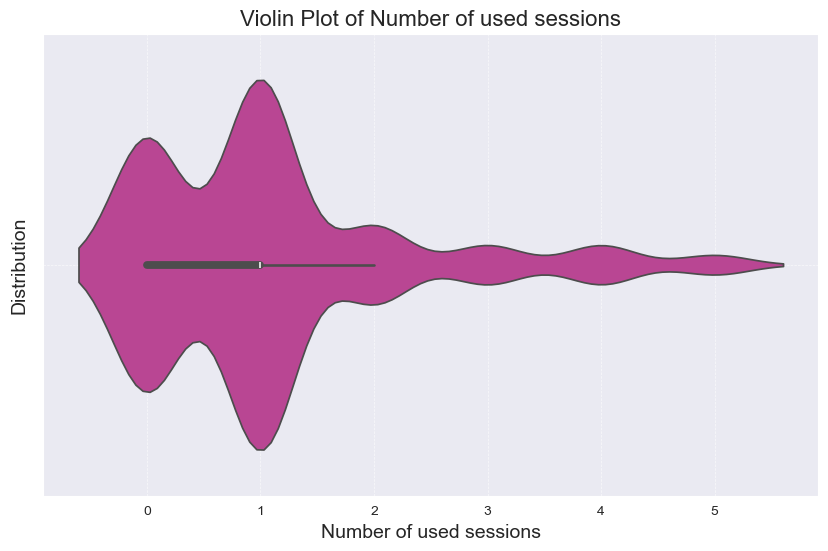

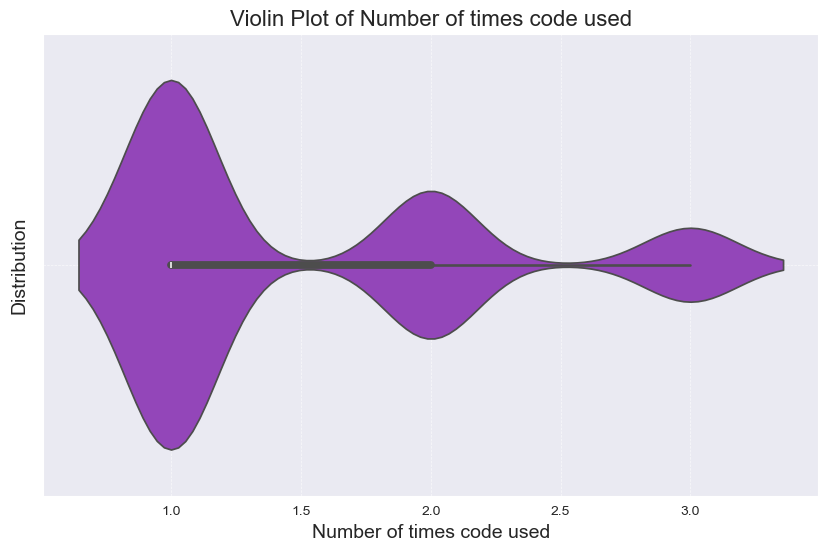

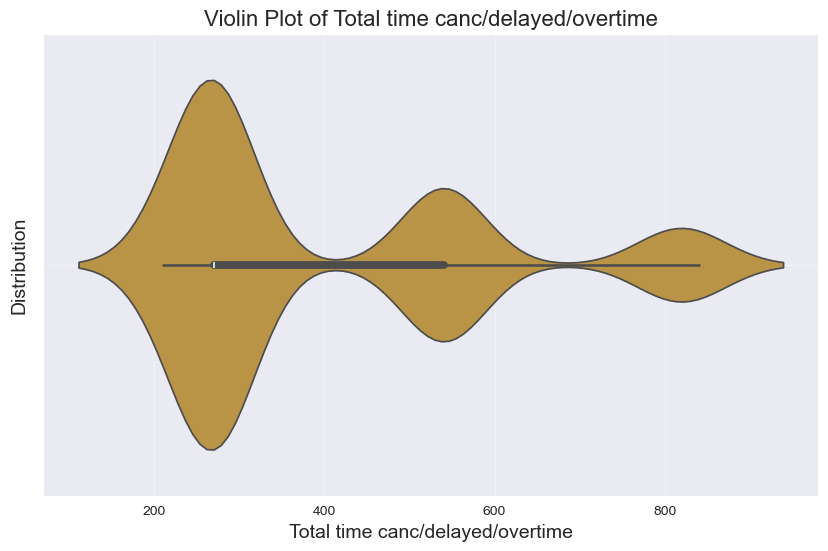

In [25]:
sns.set_style("darkgrid")

# Features selection
features = ['Number of booked sessions', 'Booked time - breaks', 'Total time used', 
            'Total time allocated for breaks', 'Number of used sessions', 
            'Number of times code used', 'Total time canc/delayed/overtime']

# Color palette
color_palette = [(0.2, 0.4, 0.6), (0.6, 0.4, 0.2), (0.8, 0.2, 0.4),
                  (0.4, 0.6, 0.2), (0.2, 0.8, 0.4), (0.4, 0.2, 0.8), (0.6, 0.8, 0.2)]

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(x=merged_data[feature], color=custom_palette[i])
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Distribution', fontsize=14)
    ax.set_title(f'Violin Plot of {feature}', fontsize=16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid lines
    plt.show()

- The violin plots show us how different aspects of our session management vary. We can see that most sessions have fewer bookings, shorter breaks, and shorter total usage times. Some activities, like code usage, happen more often than others. Also, we notice a range of total break times and times for canceled or delayed sessions, indicating differences in scheduling patterns. 

## Insights :

- Booked Sessions: Most sessions have few appointments, suggesting potential underutilization of resources. We should aim to fill empty slots during slower periods.

- Break Durations: Sessions typically have short breaks, ensuring smooth operations. We need to ensure breaks are sufficient for surgeon rest and compliance.

- Total Usage Times: Some sessions are longer, indicating variability in scheduling efficiency. Investigating these sessions can help streamline our scheduling.

- Code Usage: Different codes are used with varying frequencies, highlighting scheduling challenges. Analyzing these patterns can improve our scheduling accuracy.

2. Total Break Time and Code Usage Frequency: Variability in break times and code usage underscores the need for flexible scheduling to meet surgeon needs and resource demands.

## Recommendations :

1. Optimize Slot Utilization: Fill empty slots during off-peak times to maximize resource utilization.

2. Ensure Adequate Breaks: Review break policies to ensure surgeons have adequate rest between appointments.

3. Streamline Scheduling: Investigate longer sessions to identify opportunities for efficiency improvements.

4. Refine Code Usage: Analyze code usage patterns to enhance scheduling accuracy and resource allocation.

5. Maintain Flexibility: Keep scheduling processes flexible to accommodate surgeon preferences and optimize resource utilization.

 By implementing these recommendations will enhance session management efficiency, improve resource allocation, and support surgeon satisfaction.

 ***********************************************************************************************************************************************